# UCI SEMICOM dataset


After doing research about the dataset which can be found in the *word document* I will have put in the same folder as this analysis, I will now start to work on the dataset. I've taken a look into the dataset ( which you can also see in the sample ) and I know I have many columns with numerical variables. 

#### First we import all the important stuff and our dataset. 

In [509]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

SemiCom = pd.read_csv("uci-secom.csv")
np.random.seed(0)

#### I will also add a function that makes sure the output is shown on full screen and not in a scrollable block.

In [510]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}

<IPython.core.display.Javascript object>

***
Here we can check our data really quick.
***

In [511]:
SemiCom.sample(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
319,2008-08-20 01:42:00,2926.40,2421.45,2180.9666,998.4939,1.3990,100.0,106.3311,0.1216,1.3899,...,NaN,0.5036,0.0150,0.0035,2.9800,0.0262,0.0076,0.0022,29.1606,-1
1045,2008-09-23 22:25:00,2935.34,2551.27,2276.4556,2148.5397,1.2317,100.0,93.6778,0.1199,1.4132,...,NaN,0.4941,0.0178,0.0043,3.6018,0.0257,0.0174,0.0060,67.6124,-1
1323,2008-05-10 14:34:00,3023.56,2555.88,2205.2555,1412.7131,0.9785,100.0,95.2556,0.1216,1.5407,...,NaN,0.5018,0.0127,0.0034,2.5350,0.0230,0.0210,0.0053,91.4264,-1
579,2008-08-30 11:12:00,3042.36,2493.85,2124.8444,1180.2820,0.8465,100.0,100.7978,0.1257,1.3725,...,NaN,0.4970,0.0143,0.0031,2.8703,0.0182,0.0139,0.0039,76.6094,-1
414,2008-08-22 10:47:00,2965.48,2467.94,2178.6889,1657.3518,1.6603,100.0,100.8022,0.1229,1.5611,...,43.1616,0.5008,0.0109,0.0029,2.1758,0.0433,0.0187,0.0056,43.1616,-1


## Cleaning the data

***
Before I can start to work with this dataset i need to clean it. The information from the dataset said we did have missing values so lets start to work on those:

* I first want to see what I'm dealing with. So I can decide if i want to remove columns or add values.
***

In [512]:
#Let's check how many rows and columns we have in this dataset
totaldata = np.product(SemiCom.shape)
totaldata

927664

In [513]:
#Total amount of missimg data
missingdata = SemiCom.isnull().sum()
totalmissingdata = missingdata.sum()
totalmissingdata 

41951

***
Now one thing i want to do is check the percentage of the total missing values in this dataset.
***

In [514]:
(totalmissingdata/totaldata) * 100

4.522219251798065

In [515]:
#I wanted to check which colums had the most NaN values
missingdata.sort_values(ascending=False).head(10)

158    1429
292    1429
293    1429
157    1429
85     1341
492    1341
220    1341
358    1341
517    1018
245    1018
dtype: int64

## Step 1 Cleaning: The threshold ###

***
As you can see not much of the data is missing so removing these wont have a big impact since the dataset has very many values. But, it is necessary to have a clean dataset so that our prediction is more accurate. So my plan is to make a threshold of 15%. When a column is missing more then 15% the collumn gets removed.
***

In [516]:
threshold = 0.15

columns_to_drop = missingdata[missingdata > threshold * len(SemiCom)].index
print(columns_to_drop)

Index(['72', '73', '85', '109', '110', '111', '112', '157', '158', '220',
       '244', '245', '246', '247', '292', '293', '345', '346', '358', '382',
       '383', '384', '385', '492', '516', '517', '518', '519', '546', '547',
       '548', '549', '550', '551', '552', '553', '554', '555', '556', '557',
       '562', '563', '564', '565', '566', '567', '568', '569', '578', '579',
       '580', '581'],
      dtype='object')


***
So here we can see all the columns that are above the threshold and need to be removed. My next step is dropping these columns and checking before and after if columns have been removed. I wanted to do this bit with the 'dropna()' function but this drops rows or columns based on missing values. It cannot be used to drop columns that you specify.
***

In [517]:
print(SemiCom.columns)

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)


In [518]:
SemiCom_dropped = SemiCom.drop(columns=columns_to_drop) #Dropping the columns that have more then 15% missing values

print(SemiCom_dropped.columns)

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=540)


***

As you can see our columns length has gone down from 592 to 540. Now we need look for other ways to remove columns that are useless because now we still have too many columns. 
After doing some research and asking ChatGPT how i could clean a dataset that has many numerical columns. I found the Variance threshold which means that you remove the columns that have mostly the same information. And because it's almost constantly the same it is not very usefull.

This is usefull for me because my dataset has many columns with probably the same information. Which wont provide any extra information for the model.

***

## Step 2: Variance threshold

*** 
First we have to change the types to a numerical type. 
***

In [519]:
#had a small error about the time not being able to covert to float
SemiCom_dropped['Time'] = pd.to_numeric(SemiCom_dropped['Time'], errors='coerce')


In [520]:
print(SemiCom_dropped.dtypes)

Time         float64
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 540, dtype: object


***
I chose a variance of 0.05 because in my opinion if its beneath 0.05 it is a very minimal change and wont affect the module.
***

In [521]:

thresholder = VarianceThreshold(threshold=0.05)

X_high_variance = thresholder.fit_transform(SemiCom_dropped)
#put the remaining columns in a list
selected_features = SemiCom_dropped.columns[thresholder.get_support()].tolist()
SemiCom_filtered = SemiCom_dropped[selected_features]

SemiCom_filtered.columns

/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


Index(['0', '1', '2', '3', '4', '6', '12', '14', '15', '16',
       ...
       '570', '571', '572', '573', '574', '576', '577', '585', '589',
       'Pass/Fail'],
      dtype='object', length=251)

***
Yep! that was a good one. We just cut our columns in half from 540 to 251.

***

## Step 3: Correlation Matrix

***
With this method we want to reduce highly correlated columns. The reason behind this is that we probably have columns that have similar information. This will help minimalize the dataset and gives us more relevant information.

I will be using a threshold of 0.8 which means that any columns with a correlation above 0.8 will be added to the list of columns that will be removed. The "For" loop compares all the columns with eachother and if the columns are highly correlated they will be put into the variable "i" and "j". all the columns in "j" will be removed.
***

In [522]:

correlation_matrix = SemiCom_filtered.corr().abs()
threshold = 0.8  #Remove columns with a correlation above 0.8

#Find columns with high correlation
highly_correlated_cols = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_cols.append(colname_j)

#Dropping highly correlated columns
SemiCom_correlated = SemiCom_filtered.drop(columns=highly_correlated_cols)
print(highly_correlated_cols)


['140', '275', '413', '148', '152', '154', '283', '287', '289', '420', '421', '425', '427', '36', '60', '46', '50', '66', '65', '70', '196', '197', '199', '204', '205', '207', '332', '333', '335', '336', '340', '341', '343', '469', '477', '479', '252', '390', '524', '270', '408', '271', '409', '272', '410', '273', '411', '274', '412', '275', '413', '277', '415', '152', '154', '283', '287', '289', '420', '421', '425', '427', '285', '286', '424', '154', '283', '287', '289', '420', '421', '425', '427', '283', '287', '289', '420', '421', '425', '427', '290', '428', '164', '294', '430', '295', '431', '296', '297', '165', '294', '430', '431', '434', '435', '436', '294', '430', '431', '434', '435', '436', '301', '437', '448', '316', '452', '453', '318', '454', '319', '455', '187', '321', '323', '457', '459', '321', '323', '457', '459', '324', '467', '197', '199', '203', '204', '205', '207', '332', '333', '335', '336', '340', '341', '343', '469', '471', '477', '479', '199', '204', '205', '207'

In [523]:
SemiCom_correlated.columns

Index(['0', '1', '2', '3', '4', '6', '12', '14', '15', '16',
       ...
       '539', '545', '561', '570', '571', '572', '573', '585', '589',
       'Pass/Fail'],
      dtype='object', length=138)

***
Now we're getting somewhere. We went from 251 to 138. I think this is pretty decent but I'm not completely happy with the amount of columns left. So I'm going to do some more research and find other ways to minimalize this number.
***

## Step 4: Fill Missing values

***
One of the last Cleaning steps is filling the remaining missing values. I'm doing this by filling the missing value with the mean or median. But which one is the best option for this dataset? When I searched online I found out that mean is often used when the distribution is pretty symmetric in this case median can also be used. The difference wont be big. When the distribution is skewed the mean is not useful. The median is less sensitive to outliers.

So our first step is seeing what distribution this dataset has.
***

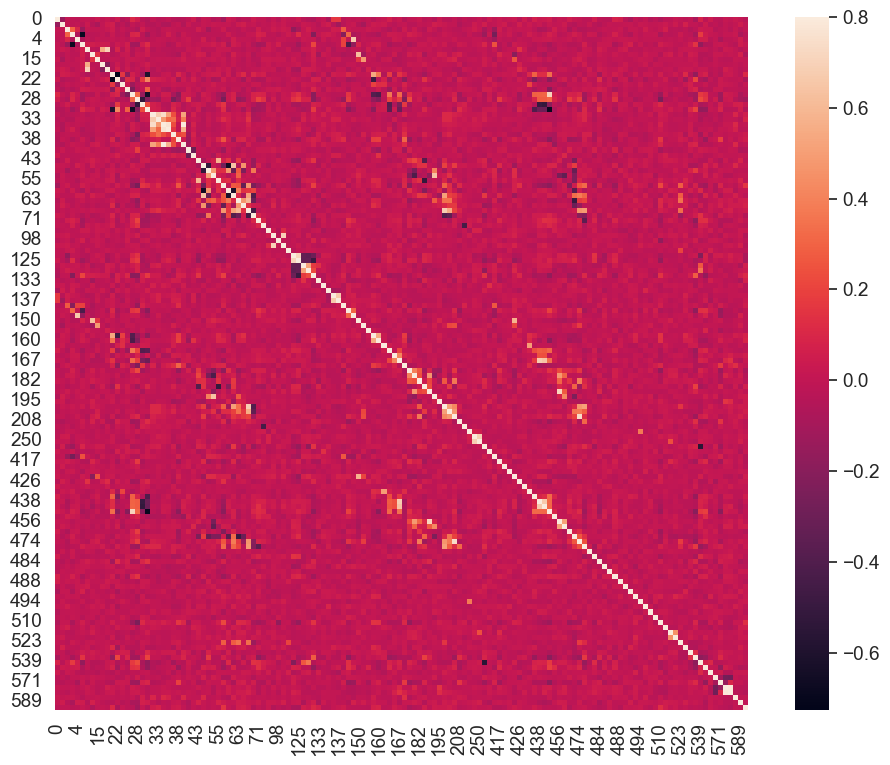

In [524]:
from matplotlib import pyplot as plt

corrmat = SemiCom_correlated.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


***
Let's look at the skewness of our dataset.
***

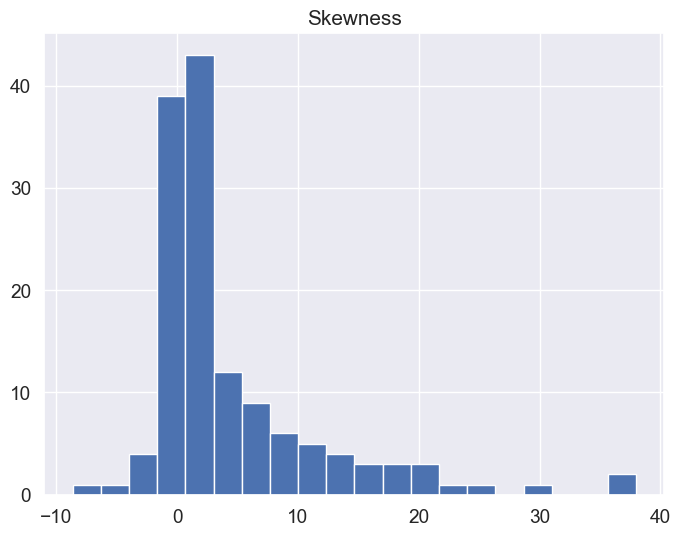

In [525]:
skewness = SemiCom_correlated.skew()

plt.figure(figsize=(8, 6))
plt.hist(skewness, bins=20)
plt.title('Skewness')
plt.show()

***
So from the graph above we can mke the conclusion that we're dealing with a skewed distribution. And from our research we now know we need to use the "Mean" to fill/Impude the remaining missing values.
***

In [526]:
SemiCom_correlated = SemiCom_correlated.fillna(SemiCom_correlated.mean())
missingdata = SemiCom_correlated.isnull().sum()
totalmissingdata = missingdata.sum()
print(totalmissingdata)

0


## Step 5: Handling outliers - Is this a good method for my dataset?

***

To clean my dataset some more my next step was to get rid of the outliers. But when i started removing the outliers 1/3 of my dataset went away. So I'm not too sure about handling the outliers

<AxesSubplot: >

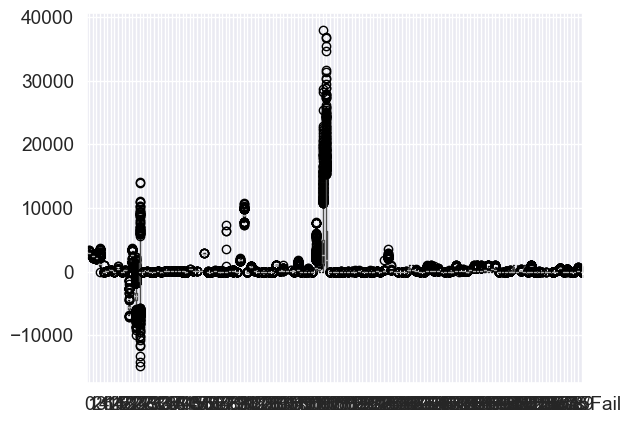

In [527]:
SemiCom_correlated.boxplot()

In [528]:
threshold_percentile = 99  # Consider values above the 95th percentile as outliers

# Iterate over each column
for column in SemiCom_correlated.columns:
    # Calculate the threshold value for the column
    threshold = np.percentile(SemiCom_correlated[column], threshold_percentile)

    # Identify outliers and replace them with NaNs
    SemiCom_correlated.loc[SemiCom_correlated[column] > threshold, column] = np.nan

# Drop rows with any NaN values
df_cleaned = SemiCom_correlated.dropna()


<AxesSubplot: >

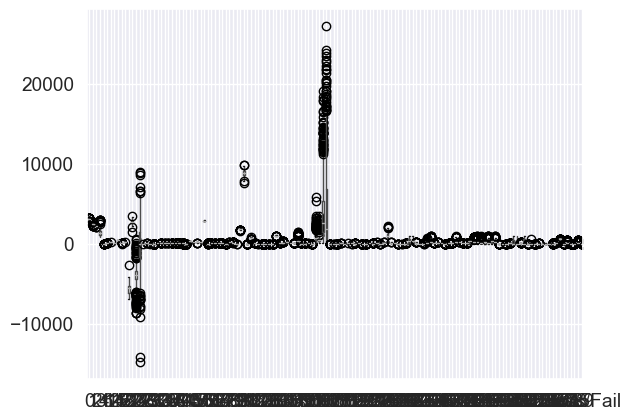

In [529]:
df_cleaned.boxplot()

In [530]:
print(df_cleaned.shape)
print(SemiCom_correlated.shape)


(511, 138)
(1567, 138)
